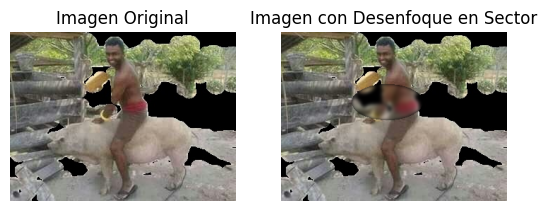

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector(img, centro, x, y):
    img1 = np.copy(img)
    valx, valy = centro
    medioz=x//2
    medioy=y//2
    mascara = np.zeros_like(img, dtype=np.uint8)

    cv2.ellipse(mascara,(valx, valy), (medioz, medioy), 0, 0, 360,(255,255,255), -1)
    img_mascara = cv2.bitwise_and(img, mascara)

    desefonque = cv2.GaussianBlur(img_mascara, (15,15), 0)

    img1[mascara!=0]=desefonque[mascara!=0]

    return img1 


imagen = cv2.imread(r'MontaPuercos.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

image_fin = desenfoque_sector(imagen,(150,100), 100, 50)

# Mostrar la imagen original a color
plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen después del desenfoque en un sector específico
plt.subplot(1, 2, 2)
plt.imshow(image_fin)
plt.title('Imagen con Desenfoque en Sector')
plt.axis('off')

plt.show()


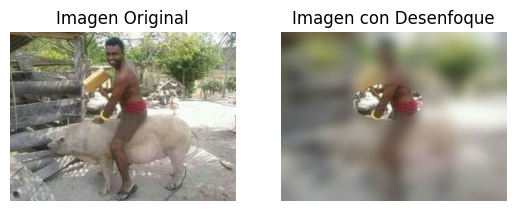

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector(img, centro, x, y):
    img1 = np.copy(img)
    valx, valy = centro
    medioz=x//2
    medioy=y//2
    mascara = np.zeros_like(img, dtype=np.uint8)

    cv2.ellipse(mascara,(valx, valy), (medioz, medioy), 0, 0, 360,(255,255,255), -1)
    mascara_invertida = cv2.bitwise_not(mascara)

    desenfoque = cv2.GaussianBlur(img, (51,51), 0)

    img1[mascara_invertida != 0] = desenfoque[mascara_invertida != 0]

    return img1

imagen = cv2.imread(r'MontaPuercos.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

image_fin = desenfoque_sector(imagen, (150,100), 100, 50)


plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(image_fin)
plt.title('Imagen con Desenfoque')
plt.axis('off')

plt.show()


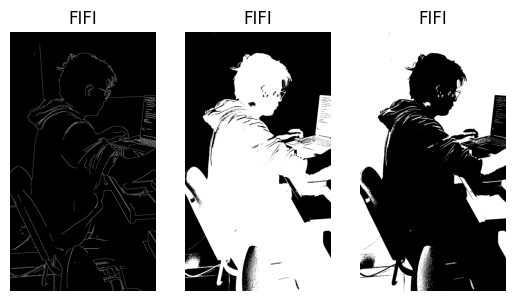

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(r'edu.jpg')
 

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
_, umbral_inc_bi = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV) 



plt.subplot(131)
plt.title('FIFI')
plt.imshow(edges ,cmap='gray')
plt.axis('off')
    
plt.subplot(132)
plt.title('FIFI')
plt.imshow(umbral_inc_bi ,cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('FIFI')
plt.imshow(a ,cmap='gray')
plt.axis('off')

plt.show()


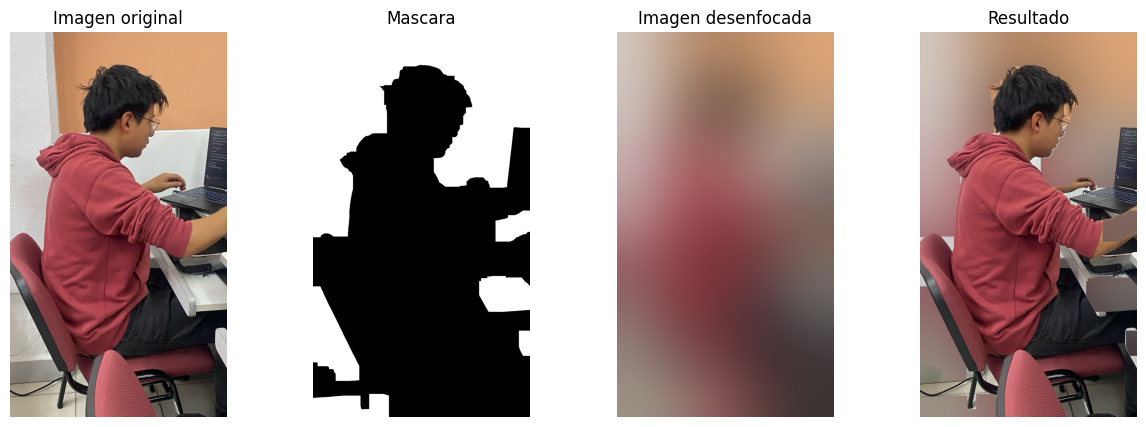

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread(r'edu.jpg')

imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbralbi = cv2.threshold(imagen_gray, 150, 255, cv2.THRESH_BINARY)

mascara = np.zeros_like(a, dtype=np.uint8)

contornos, _ = cv2.findContours(a, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

kernel = np.ones((30, 30), np.uint8)
mascara = cv2.erode(mascara, kernel, iterations=2)
mascara = cv2.dilate(mascara, kernel, iterations=2)

blurred_img = cv2.GaussianBlur(imagen, (1011, 1011), 0)

img_Final = np.copy(imagen)
img_Final[mascara != 0] = blurred_img[mascara != 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mascara, cmap="gray")
plt.title('Mascara')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Imagen desenfocada')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(img_Final, cv2.COLOR_BGR2RGB))
plt.title('Resultado')
plt.axis('off')

plt.show()







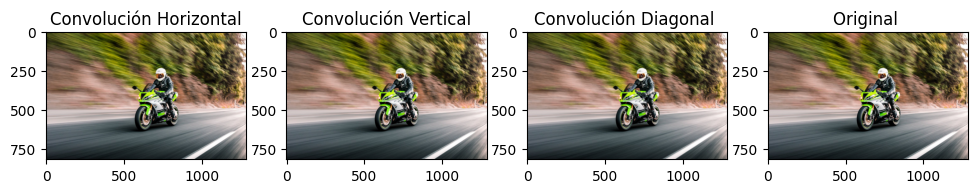

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_horizontal(img, kernel_size):
    kernel = np.ones((1, kernel_size), np.float32) / kernel_size
    img_conv = cv2.filter2D(img, -1, kernel)
    return img_conv

def conv_vertical(img, kernel_size):
    kernel = np.ones((kernel_size, 1), np.float32) / kernel_size
    img_conv = cv2.filter2D(img, -1, kernel)
    return img_conv

def conv_diagonal(img, kernel_size):
    kernel = np.identity(kernel_size, np.float32) / 3
    img_conv = cv2.filter2D(img, -1, kernel)
    return img_conv

image = cv2.imread(r"soyfranchesiFIUUUUUUUUUUUUUUUUUU.jpg")
b, g, r = cv2.split(image)

kernel_size = 3

b_conv_horizontal = conv_horizontal(b, kernel_size)
g_conv_horizontal = conv_horizontal(g, kernel_size)
r_conv_horizontal = conv_horizontal(r, kernel_size)

b_conv_vertical = conv_vertical(b, kernel_size)
g_conv_vertical = conv_vertical(g, kernel_size)
r_conv_vertical = conv_vertical(r, kernel_size)

b_conv_diagonal = conv_diagonal(b, kernel_size)
g_conv_diagonal = conv_diagonal(g, kernel_size)
r_conv_diagonal = conv_diagonal(r, kernel_size)

img_conv_horizontal = cv2.merge((b_conv_horizontal, g_conv_horizontal, r_conv_horizontal))
img_conv_vertical = cv2.merge((b_conv_vertical, g_conv_vertical, r_conv_vertical))
img_conv_diagonal = cv2.merge((b_conv_diagonal, g_conv_diagonal, r_conv_diagonal))

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualización
plt.figure(figsize=(15, 5))

plt.subplot(151)
plt.title("Convolución Horizontal")
plt.imshow(cv2.cvtColor(img_conv_horizontal, cv2.COLOR_BGR2RGB))

plt.subplot(152)
plt.title("Convolución Vertical")
plt.imshow(cv2.cvtColor(img_conv_vertical, cv2.COLOR_BGR2RGB))

plt.subplot(153)
plt.title("Convolución Diagonal ")
plt.imshow(cv2.cvtColor(img_conv_diagonal, cv2.COLOR_BGR2RGB))

plt.subplot(154)
plt.title("Original ")
plt.imshow(img_rgb)

plt.show()
